In [4]:
import numpy as np
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import matplotlib.pyplot as  plt
from PIL import Image
from util import *

from custom_darknet import *

In [5]:
a = open('D:/github/darknet/data/VOCdevkit/VOC2007/labels/000001.txt')

In [6]:
for row in a.readlines():
    
    row = row.rstrip('\n')
    print(row[0])

1
1


In [7]:
a.readlines()

[]

In [8]:
class DataLoader(data.Dataset):
    def __init__(self, data_path, txt_list, classes=1000):
        self.data_path = data_path
        self.names = self.__dataset_info(txt_list)
        self.N = len(self.names)
        self.__image_transformer = transforms.Compose([
            transforms.Resize(416, Image.BILINEAR),
            transforms.CenterCrop(416),
            transforms.ToTensor()])

    def __dataset_info(self,txt_labels): 
        with open(txt_labels, 'r') as f:
            images_list = f.readlines()

        file_names = []
        labels = []
        for row in images_list:
          #print(row)

            row = row.rstrip('\n').split('\t')
            
            file_names.append(row[0][-10:-4])

        return file_names
    def get_labels(self,filename,index):
        label_path = self.data_path + '/labels/' + self.names[index] + '.txt'
        #print(open(label_path))
        with open(label_path) as f:
            label_list = f.readlines()
        labels = []
        #print(label_list)
        for row in label_list:
            row = row.rstrip('\n').split(' ')
            row = [float(i) for i in row]
            row[0] = int(row[0])
            #print(row.apply())
            labels.append(row)
            
            
        return labels
    
    def __getitem__(self, index):
        #print(self.names)
        framename = self.data_path + '/JPEGImages/' + self.names[index] + '.jpg'
        #print()
        #isExist = os.path.exists(framename)

        img = Image.open(framename).convert('RGB')
        label = self.get_labels(framename,index)


        if img.size[0] != 255:
            img = self.__image_transformer(img)


        return img,label

In [9]:
data_path = 'D:/github/darknet/data/VOCdevkit/VOC2007'
txt_path = 'D:/github/darknet/data/2007_train.txt'
train_data = DataLoader(data_path,txt_path)
train_data[0]

(tensor([[[0.2824, 0.2745, 0.2745,  ..., 0.2510, 0.2627, 0.2588],
          [0.2824, 0.2784, 0.2745,  ..., 0.2471, 0.2706, 0.2627],
          [0.2824, 0.2902, 0.2824,  ..., 0.2588, 0.2667, 0.2706],
          ...,
          [0.3490, 0.3412, 0.3333,  ..., 0.2627, 0.2627, 0.2510],
          [0.3373, 0.3333, 0.3333,  ..., 0.2667, 0.2627, 0.2471],
          [0.3216, 0.3294, 0.3373,  ..., 0.2627, 0.2588, 0.2431]],
 
         [[0.2745, 0.2667, 0.2667,  ..., 0.2510, 0.2627, 0.2588],
          [0.2745, 0.2706, 0.2667,  ..., 0.2471, 0.2706, 0.2627],
          [0.2745, 0.2824, 0.2745,  ..., 0.2588, 0.2667, 0.2706],
          ...,
          [0.3490, 0.3412, 0.3333,  ..., 0.2667, 0.2667, 0.2549],
          [0.3412, 0.3333, 0.3333,  ..., 0.2706, 0.2667, 0.2510],
          [0.3255, 0.3294, 0.3373,  ..., 0.2667, 0.2627, 0.2549]],
 
         [[0.2784, 0.2706, 0.2706,  ..., 0.2510, 0.2627, 0.2588],
          [0.2784, 0.2745, 0.2706,  ..., 0.2471, 0.2706, 0.2627],
          [0.2784, 0.2863, 0.2784,  ...,

In [10]:
sample_data = train_data[0][0].cuda()
sample_data.shape

torch.Size([3, 416, 416])

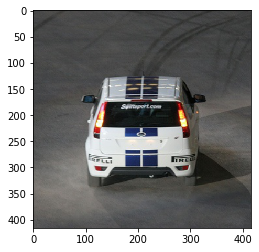

In [15]:
plt.imshow(sample_data.cpu().permute(1, 2, 0))

In [92]:
model = Darknet("cfg/yolov3-custom.cfg")
model.load_weights('yolov3.weights')
model = model.cuda()

In [10]:
model.net_info

{'type': 'net',
 'batch': '64',
 'subdivisions': '16',
 'width': '416',
 'height': '416',
 'channels': '3',
 'momentum': '0.9',
 'decay': '0.0005',
 'angle': '0',
 'saturation': '1.5',
 'exposure': '1.5',
 'hue': '.1',
 'learning_rate': '0.001',
 'burn_in': '1000',
 'max_batches': '500200',
 'policy': 'steps',
 'steps': '400000,450000',
 'scales': '.1,.1'}

In [96]:

output = model(torch.tensor(sample_data.reshape(-1,3,416,416)),True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


conv torch.Size([1, 32, 416, 416])
conv torch.Size([1, 64, 208, 208])
conv torch.Size([1, 32, 208, 208])
conv torch.Size([1, 64, 208, 208])
shortcut torch.Size([1, 64, 208, 208])
conv torch.Size([1, 128, 104, 104])
conv torch.Size([1, 64, 104, 104])
conv torch.Size([1, 128, 104, 104])
shortcut torch.Size([1, 128, 104, 104])
conv torch.Size([1, 64, 104, 104])
conv torch.Size([1, 128, 104, 104])
shortcut torch.Size([1, 128, 104, 104])
conv torch.Size([1, 256, 52, 52])
conv torch.Size([1, 128, 52, 52])
conv torch.Size([1, 256, 52, 52])
shortcut torch.Size([1, 256, 52, 52])
conv torch.Size([1, 128, 52, 52])
conv torch.Size([1, 256, 52, 52])
shortcut torch.Size([1, 256, 52, 52])
conv torch.Size([1, 128, 52, 52])
conv torch.Size([1, 256, 52, 52])
shortcut torch.Size([1, 256, 52, 52])
conv torch.Size([1, 128, 52, 52])
conv torch.Size([1, 256, 52, 52])
shortcut torch.Size([1, 256, 52, 52])
conv torch.Size([1, 128, 52, 52])
conv torch.Size([1, 256, 52, 52])
shortcut torch.Size([1, 256, 52, 52])

In [75]:
output

tensor([[[ 13.8920,  16.3879, 107.6102,  ...,   0.4433,   0.5709,   0.5226],
         [ 17.7196,  20.1235, 168.8758,  ...,   0.5494,   0.5499,   0.4925],
         [ 18.8663,  16.9606, 333.5635,  ...,   0.4805,   0.4829,   0.5556],
         ...,
         [412.3426, 411.4401,   9.7593,  ...,   0.5001,   0.5086,   0.5937],
         [411.7588, 412.5188,  15.4275,  ...,   0.5220,   0.4386,   0.4726],
         [412.0357, 412.6851,  31.7159,  ...,   0.6167,   0.5567,   0.5245]]],
       device='cuda:0')

In [83]:
prediction = output
confidence = 0.5
num_classes=80
nms_conf = 0.5

In [94]:

conf_mask = (prediction[:,:,4] > confidence).float().unsqueeze(2)
prediction = prediction*conf_mask

box_corner = prediction.new(prediction.shape)
box_corner[:,:,0] = (prediction[:,:,0] - prediction[:,:,2]/2)
box_corner[:,:,1] = (prediction[:,:,1] - prediction[:,:,3]/2)
box_corner[:,:,2] = (prediction[:,:,0] + prediction[:,:,2]/2) 
box_corner[:,:,3] = (prediction[:,:,1] + prediction[:,:,3]/2)
prediction[:,:,:4] = box_corner[:,:,:4]

batch_size = prediction.size(0)

write = False

#print(prediction)

for ind in range(batch_size):
    image_pred = prediction[ind]          #image Tensor
   #confidence threshholding 
   #NMS
    
    max_conf, max_conf_score = torch.max(image_pred[:,5:5+ num_classes], 1)
    max_conf = max_conf.float().unsqueeze(1)
    max_conf_score = max_conf_score.float().unsqueeze(1)
    seq = (image_pred[:,:5], max_conf, max_conf_score)
    #print(max_conf_score.shape)
    image_pred = torch.cat(seq, 1)

    non_zero_ind =  (torch.nonzero(image_pred[:,4]))
    #print(non_zero_ind)
    try:
        image_pred_ = image_pred[non_zero_ind.squeeze(),:].view(-1,7)
    except:
        continue

    if image_pred_.shape[0] == 0:
        continue       
#        
    #print(image_pred_.shape)
    #Get the various classes detected in the image
    img_classes = unique(image_pred_[:,-1])  # -1 index holds the class index
    
    for cls in img_classes:
        #perform NMS


        #get the detections with one particular class
        cls_mask = image_pred_*(image_pred_[:,-1] == cls).float().unsqueeze(1)
        
        class_mask_ind = torch.nonzero(cls_mask[:,-2]).squeeze()
        print(class_mask_ind)
        image_pred_class = image_pred_[class_mask_ind].view(-1,7)
        print(image_pred_class)
        #sort the detections such that the entry with the maximum objectness
        #confidence is at the top
        conf_sort_index = torch.sort(image_pred_class[:,4], descending = True )[1]
        image_pred_class = image_pred_class[conf_sort_index]
        idx = image_pred_class.size(0)   #Number of detections

        for i in range(idx):
            #Get the IOUs of all boxes that come after the one we are looking at 
            #in the loop
            try:
                ious = bbox_iou(image_pred_class[i].unsqueeze(0), image_pred_class[i+1:])
            except ValueError:
                break

            except IndexError:
                break

            #Zero out all the detections that have IoU > treshhold
            iou_mask = (ious < nms_conf).float().unsqueeze(1)
            image_pred_class[i+1:] *= iou_mask       

            #Remove the non-zero entries
            non_zero_ind = torch.nonzero(image_pred_class[:,4]).squeeze()
            image_pred_class = image_pred_class[non_zero_ind].view(-1,7)

        batch_ind = image_pred_class.new(image_pred_class.size(0), 1).fill_(ind)      #Repeat the batch_id for as many detections of the class cls in the image
        seq = batch_ind, image_pred_class

        if not write:
            output = torch.cat(seq,1)
            write = True
        else:
            out = torch.cat(seq,1)
            output = torch.cat((output,out))
        break

tensor([ 202,  447,  456,  702,  814,  933, 1058, 1060, 1063, 1067, 1070, 1086,
        1100, 1104, 1116, 1145, 1177, 1180, 1181, 1183, 1185, 1194, 1204, 1219,
        1220, 1228, 1232, 1233, 1251, 1252, 1260, 1263, 1285, 1299, 1301, 1312,
        1325, 1327, 1351, 1356, 1362, 1375, 1388, 1392, 1393, 1420, 1427, 1432,
        1443, 1445, 1447, 1450, 1464, 1465, 1476, 1498, 1507, 1540, 1543, 1548,
        1584, 1587, 1590, 1605, 1646, 1656, 1689, 1695, 1702, 1703, 1704, 1756,
        1757, 1759, 1761, 1762, 1815, 1816, 1828, 2013, 2081, 2087, 2157, 2164,
        2220, 2228, 2286, 2340, 2341, 2345, 2346, 2347, 2352, 2402, 2405, 2409,
        2411, 2416, 2450, 2481, 2483, 2484, 2554, 2555, 2557, 2605, 2673, 2674,
        2675, 2739, 2803, 2805, 2934, 2990, 2991, 3033, 3332, 3334, 3336, 3339,
        3343, 3374, 3388, 3393, 3445, 3452, 3469, 3492, 3493, 3495, 3513, 3516,
        3518, 3529, 3537, 3549, 3554, 3564, 3577, 3586, 3592, 3609, 3616, 3619],
       device='cuda:0')
tensor([[118.72

In [97]:
output_img = write_results(output,0.5,80).detach()

In [99]:
output_img

tensor([[0.0000e+00, 9.4162e+01, 1.1767e+02, 3.1925e+02, 3.3843e+02, 9.8682e-01,
         3.1454e-01, 5.0000e+00],
        [0.0000e+00, 1.0100e+02, 1.1400e+02, 3.1522e+02, 3.2979e+02, 9.6071e-01,
         1.1702e-01, 2.8000e+01]], device='cuda:0')

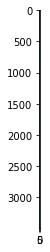

In [60]:
output_label = output_

In [ ]:
class class_loss(torch.nn.Module):
    def __int__(self,object_threshold):
        super(class_loss,self).__init__()
        self.object_threshold = object_threshold
        
    def forward(output,truth):
        for box in output:
            if box[:4] >= self.object_threshold:
                obj_sum = box.sum(4)

In [ ]:
class total_loss(torch.nn.Module):
    def __int__(self,lambda_nobject=0.5,lambda_coord=5):
        self.lambda_nobject = lambda_nobject
        self.lambda_coord = lambda_coord
    def forward(output,truth):
        classes = truth[:,]